### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame, Series

# DATA PREPARATION

#### EXAMINING CUSTOMER DATA

In [2]:
purc = pd.read_csv('purchase.csv') # file is in the current directory I am working.
# TO check current directory use 'pwd'
purc.head(6) # Displaing top 6 Fields

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget


In [3]:
purc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#### Number of Each type of Premium Customer

In [6]:
purc['PREMIUM_CUSTOMER'].value_counts() # Number of Customer in Premium

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Type based on Premium')

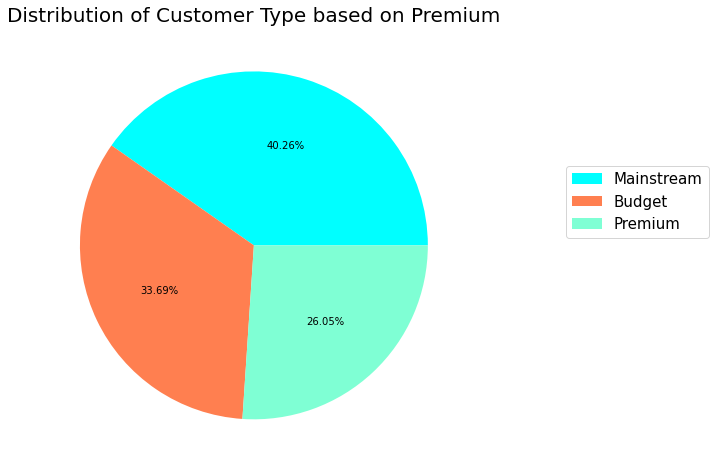

In [9]:
plt.figure(figsize=(8,8))
plt.pie(purc['PREMIUM_CUSTOMER'].value_counts(),colors=['cyan','coral','aquamarine'],
       
       autopct='%.2f%%')

plt.legend(purc["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,bbox_to_anchor=(1.2,0.7))
plt.title("Distribution of Customer Type based on Premium", fontsize=20)

#### Number of Customer in Lifestage

In [8]:
purc['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Type based on Lifestage')

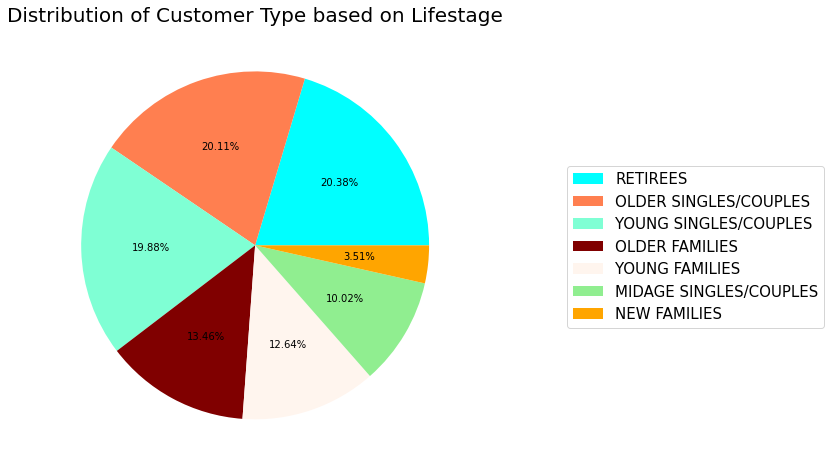

In [11]:
plt.figure(figsize=(8,8))
plt.pie(purc['LIFESTAGE'].value_counts(),colors=['cyan','coral','aquamarine','maroon','seashell','lightgreen','orange'],
       
       autopct='%.2f%%')

plt.legend(purc["LIFESTAGE"].value_counts().index, fontsize=15,bbox_to_anchor=(1.2,0.7))
plt.title("Distribution of Customer Type based on Lifestage", fontsize=20)

#### Number of Customer in LIFESTAGE based on PREMIUM

In [88]:
lifestage_premium_count = pd.DataFrame(purc.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count())
lifestage_premium_count.columns=['Count']
lifestage_premium_count.sort_values(by='Count')

Count
LIFESTAGE              PREMIUM_CUSTOMER       
NEW FAMILIES           Premium             588
                       Mainstream          849
                       Budget             1112
MIDAGE SINGLES/COUPLES Budget             1504
OLDER FAMILIES         Premium            2274
MIDAGE SINGLES/COUPLES Premium            2431
YOUNG FAMILIES         Premium            2433
YOUNG SINGLES/COUPLES  Premium            2574
YOUNG FAMILIES         Mainstream         2728
OLDER FAMILIES         Mainstream         2831
MIDAGE SINGLES/COUPLES Mainstream         3340
YOUNG SINGLES/COUPLES  Budget             3779
RETIREES               Premium            3872
YOUNG FAMILIES         Budget             4017
RETIREES               Budget             4454
OLDER FAMILIES         Budget             4675
OLDER SINGLES/COUPLES  Premium            4750
                       Budget             4929
                       Mainstream         4930
RETIREES               Mainstream         6479
YOUNG SINGLES/COUPLES  Mainstream         8088

Text(0, 0.5, 'Count of Customer')

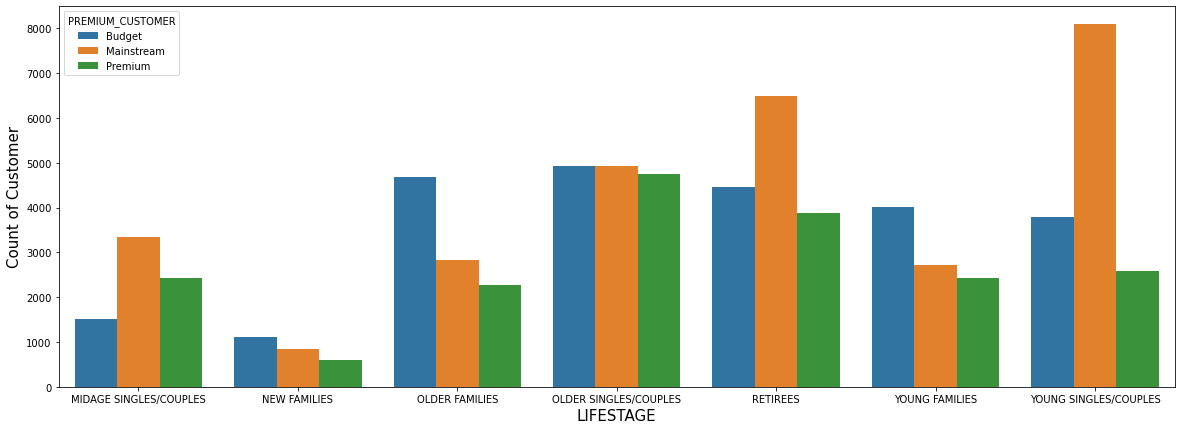

In [14]:
plt.figure(figsize=(20,7))

sns.barplot(x=lifestage_premium_count.reset_index()['LIFESTAGE'],y=lifestage_premium_count.reset_index()['Count'],hue=
           lifestage_premium_count.reset_index()['PREMIUM_CUSTOMER'])
plt.xlabel("LIFESTAGE",fontsize=15)
plt.ylabel("Count of Customer",fontsize=15)

In [21]:
purc['LYLTY_CARD_NBR'].nunique()

72637

### EXAMINING TRANSACTION DATA

In [15]:
trans = pd.read_csv('transaction.csv')
trans.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [16]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [17]:
trans['DATE'].describe()

count    264836.000000
mean      43464.036260
std         105.389282
min       43282.000000
25%       43373.000000
50%       43464.000000
75%       43555.000000
max       43646.000000
Name: DATE, dtype: float64

In [18]:
trans['DATE']= pd.to_datetime(trans['DATE'],errors = 'coerce',unit='d',origin ='1899-12-30')#Chaning datetime to proper format

In [20]:
trans['DATE'].describe()

<ipython-input-20-809ba0af7429>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans['DATE'].describe()


count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [107]:
trans['month'] = pd.DatetimeIndex(trans['DATE']).month

In [ ]:
trans_d = trans.groupby(['month'])['PROD_QTY'].

In [108]:
trans

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACT_SIZE,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,8
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175,3
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175,8
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170,11
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150,12


In [96]:
trans_copy = trans

In [100]:
trans_copy

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACT_SIZE
DATE,,,,,,,,,
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150
...,...,...,...,...,...,...,...,...,...
2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175
2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175
2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170


In [ ]:
trans_copy.set_index('DATE') 

In [103]:
print(pd.date_range(
  start="2018-07-01", end="2019-06-30").difference(trans_copy.index))#  Finding the missing date as there were only 364 dates. 

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


<AxesSubplot:xlabel='DATE'>

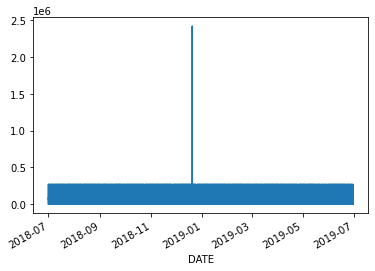

In [104]:
trans_copy['TXN_ID'].plot()

In [22]:
trans['PROD_NAME'].unique() # Consist of Brand Name, flavor and size of packet 

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [23]:
# Remove the Salsa Product
trans = trans[~trans['PROD_NAME'].str.contains(r"[Ss]alsa")]


In [24]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [25]:
# Create a new column with Product Brand
trans['BRAND_NAME']= trans['PROD_NAME'].str.split().str[0]

In [27]:
trans['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [28]:
# There are some products with multiple name. Combining them

trans['BRAND_NAME'].replace({"WW":"Woolworths","NCC":"Natural","RRD":"Red",
                            "GrnWves":"Grain","Dorito":"Doritos","Infzns":"Infuzions",
                            "Snbts":"Sunbites","Smith":"Smiths"},inplace=True)

In [29]:
# Create a new column with Packet Size
trans['PACT_SIZE'] = trans['PROD_NAME'].str.extract('(\d+)') #EXtracting a digit from the string

In [31]:
trans['PACT_SIZE'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

In [32]:
trans['PROD_QTY'].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

C:\Users\Jatin Takyar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

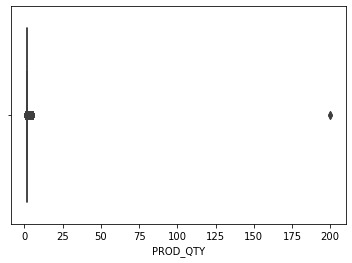

In [33]:
sns.boxplot(trans['PROD_QTY'])  # Finding Outlier

In [35]:
trans['TOT_SALES'].unique()

array([  6.  ,   6.3 ,   2.9 ,  15.  ,  13.8 ,   5.7 ,   3.6 ,   3.9 ,
         7.2 ,  23.  ,   9.2 ,   1.7 ,   3.3 ,   2.1 ,   3.  ,   3.8 ,
         5.4 ,   2.7 ,   3.7 ,  14.8 ,   4.4 ,   6.6 ,   2.6 ,   3.25,
         4.6 ,   5.8 ,  15.5 ,   7.8 ,   4.2 ,   7.4 ,   7.6 ,   8.4 ,
         6.5 ,   4.3 ,  28.5 ,   3.4 ,  19.  ,  11.8 ,  17.6 ,   9.  ,
        13.2 ,   1.9 ,  13.  ,  15.2 ,  11.4 ,  14.5 ,   5.6 ,  10.8 ,
        10.4 ,  16.5 ,   1.8 ,   5.2 ,   5.9 ,  18.4 ,   8.8 ,  18.5 ,
         6.2 ,   4.8 ,   8.6 ,   2.8 ,   2.3 ,   3.1 ,   2.4 ,  15.6 ,
        19.5 ,  27.  ,   9.9 ,  16.2 ,  13.5 ,  21.6 ,  23.6 ,  29.5 ,
        12.6 ,   8.1 ,  11.1 ,  22.  ,   9.5 ,  16.25,  11.7 ,  22.8 ,
         9.6 ,   8.5 ,  10.5 ,  21.  ,  12.  ,  14.4 ,   5.1 ,   9.75,
        16.8 ,  17.7 ,  17.2 ,  17.1 ,   6.8 ,  18.  ,  12.9 ,  11.5 ,
         8.7 ,  14.  ,  11.6 ,  12.4 , 650.  ,  21.5 ,   9.3 ,  11.2 ,
         6.9 ])

C:\Users\Jatin Takyar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

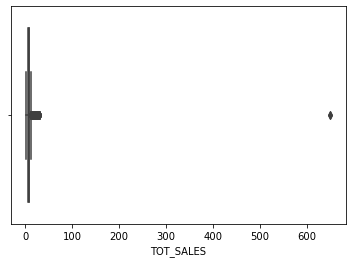

In [36]:
sns.boxplot(trans['TOT_SALES'])   # Finding Outlier

In [38]:
trans.sort_values(by="PROD_QTY",ascending = False) # Checking for extreme value

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACT_SIZE
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,Pringles,134
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,Woolworths,160
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,Thins,175
...,...,...,...,...,...,...,...,...,...,...
150883,2018-08-14,184,184055,186586,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6,Smiths,150
150885,2019-05-17,184,184152,187227,28,Thins Potato Chips Hot & Spicy 175g,1,3.3,Thins,175
29682,2018-12-04,174,174004,174974,114,Kettle Sensations Siracha Lime 150g,1,4.6,Kettle,150
150887,2019-05-17,184,184205,187584,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,Red,150


In [40]:
trans = trans[trans['PROD_QTY']<10]

# ANALYSIS

In [42]:
merged = pd.merge(trans,purc,on='LYLTY_CARD_NBR')

In [43]:
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACT_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,CCs,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   BRAND_NAME        246740 non-null  object        
 9   PACT_SIZE         246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.5+ MB


### POPULAR BRAND AMONG EACH SEGMENT OF CUSTOMER

YOUNG SINGLES/COUPLES Premium
Kettle      838
Smiths      787
Pringles    537
Doritos     489
Red         454
Name: BRAND_NAME, dtype: int64


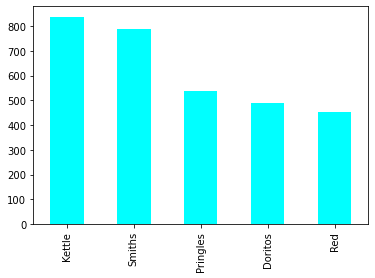

YOUNG SINGLES/COUPLES Budget
Kettle      1211
Smiths      1185
Pringles     832
Doritos      782
Red          679
Name: BRAND_NAME, dtype: int64


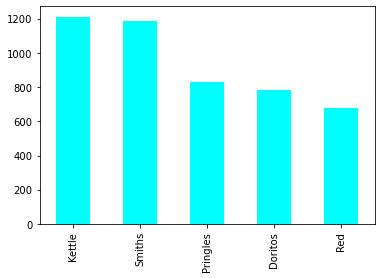

YOUNG SINGLES/COUPLES Mainstream
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND_NAME, dtype: int64


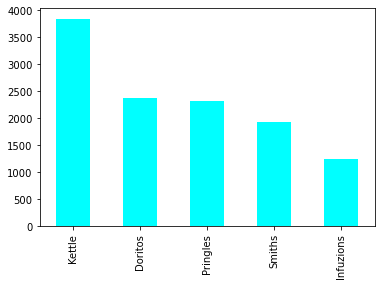

MIDAGE SINGLES/COUPLES Premium
Kettle      1206
Smiths       923
Pringles     781
Doritos      734
Red          533
Name: BRAND_NAME, dtype: int64


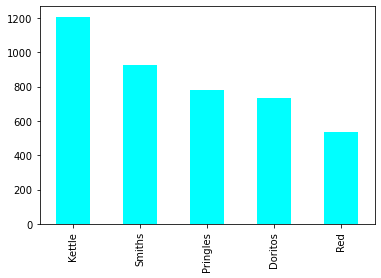

MIDAGE SINGLES/COUPLES Budget
Kettle      713
Smiths      591
Doritos     479
Pringles    449
Red         334
Name: BRAND_NAME, dtype: int64


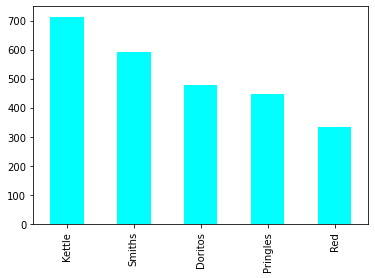

MIDAGE SINGLES/COUPLES Mainstream
Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND_NAME, dtype: int64


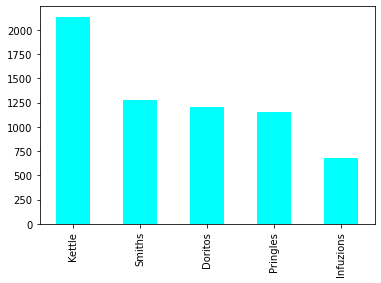

NEW FAMILIES Premium
Kettle       247
Pringles     165
Smiths       155
Doritos      154
Infuzions     87
Name: BRAND_NAME, dtype: int64


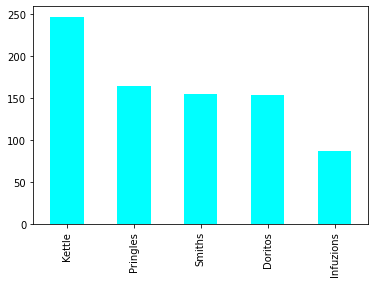

NEW FAMILIES Budget
Kettle       510
Smiths       328
Doritos      315
Pringles     309
Infuzions    180
Name: BRAND_NAME, dtype: int64


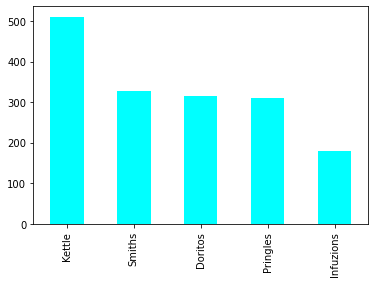

NEW FAMILIES Mainstream
Kettle      414
Doritos     257
Smiths      244
Pringles    224
Red         134
Name: BRAND_NAME, dtype: int64


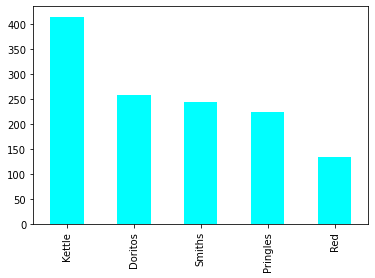

OLDER FAMILIES Premium
Kettle      1512
Smiths      1448
Pringles    1014
Doritos      923
Red          838
Name: BRAND_NAME, dtype: int64


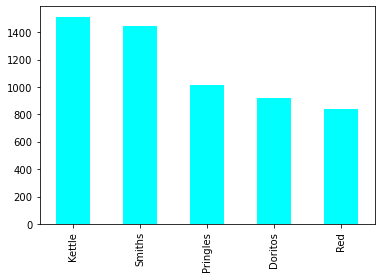

OLDER FAMILIES Budget
Kettle      3320
Smiths      2948
Doritos     2032
Pringles    1996
Red         1708
Name: BRAND_NAME, dtype: int64


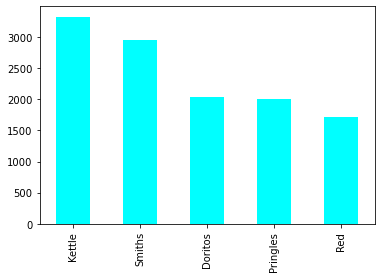

OLDER FAMILIES Mainstream
Kettle      2019
Smiths      1742
Doritos     1263
Pringles    1234
Red         1047
Name: BRAND_NAME, dtype: int64


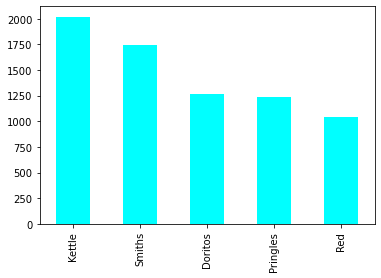

OLDER SINGLES/COUPLES Premium
Kettle      2947
Smiths      1952
Doritos     1784
Pringles    1744
Thins        997
Name: BRAND_NAME, dtype: int64


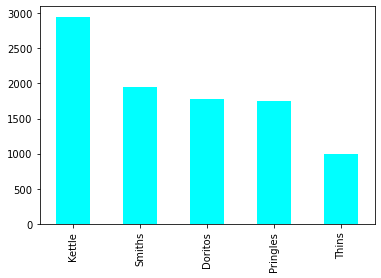

OLDER SINGLES/COUPLES Budget
Kettle       3065
Smiths       2010
Pringles     1843
Doritos      1751
Infuzions    1043
Name: BRAND_NAME, dtype: int64


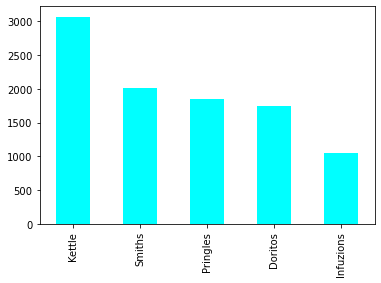

OLDER SINGLES/COUPLES Mainstream
Kettle      2835
Smiths      2070
Doritos     1791
Pringles    1720
Red         1112
Name: BRAND_NAME, dtype: int64


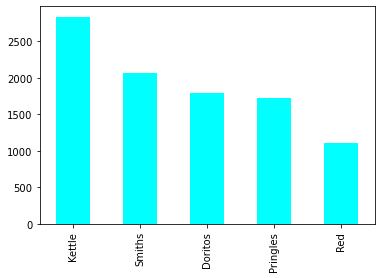

RETIREES Premium
Kettle       2216
Smiths       1395
Pringles     1331
Doritos      1306
Infuzions     758
Name: BRAND_NAME, dtype: int64


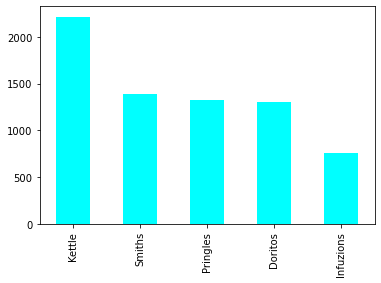

RETIREES Budget
Kettle      2592
Smiths      1612
Doritos     1592
Pringles    1517
Thins        866
Name: BRAND_NAME, dtype: int64


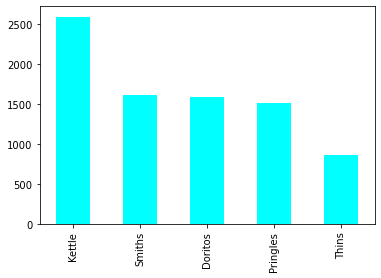

RETIREES Mainstream
Kettle      3386
Smiths      2367
Pringles    2103
Doritos     2089
Red         1223
Name: BRAND_NAME, dtype: int64


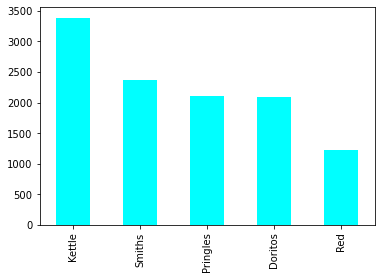

YOUNG FAMILIES Premium
Kettle      1745
Smiths      1384
Pringles    1007
Doritos     1002
Red          860
Name: BRAND_NAME, dtype: int64


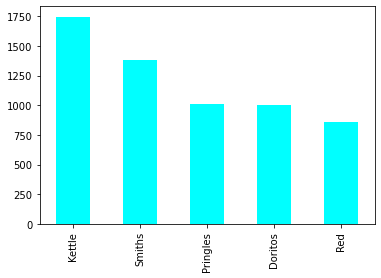

YOUNG FAMILIES Budget
Kettle      2743
Smiths      2334
Doritos     1767
Pringles    1674
Red         1347
Name: BRAND_NAME, dtype: int64


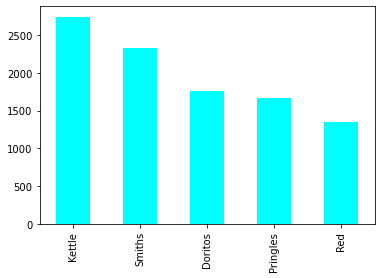

YOUNG FAMILIES Mainstream
Kettle      1789
Smiths      1681
Pringles    1148
Doritos     1125
Red          922
Name: BRAND_NAME, dtype: int64


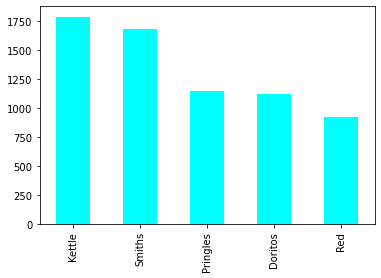

In [47]:
for cus in merged['LIFESTAGE'].unique():
    for cus1 in merged['PREMIUM_CUSTOMER'].unique():
        
        total = merged[(merged['LIFESTAGE']==cus) & (merged['PREMIUM_CUSTOMER']==cus1)]['BRAND_NAME'].value_counts().head(5)
        print(cus,cus1)
        print(total)
        total.plot(kind='bar',color='cyan')
        plt.show()

# TOTAL SALE OF EACH SEGMENT

In [48]:
lifestage_premium_totsales = merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()


In [50]:
lifestage_premium_totsales.columns=['TOT_SALES']  # Giving the name to the column

In [52]:
lifestage_premium_totsales = pd.DataFrame(lifestage_premium_totsales)

In [90]:
lifestage_premium_totsales.sort_values(by='TOT_SALES')

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
NEW FAMILIES           Premium            10760.80
                       Mainstream         15979.70
                       Budget             20607.45
MIDAGE SINGLES/COUPLES Budget             33345.70
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Budget             57122.10
OLDER FAMILIES         Premium            75242.60
YOUNG FAMILIES         Premium            78571.70
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Mainstream         86338.25
RETIREES               Premium            91296.65
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Budget            105916.30
OLDER SINGLES/COUPLES  Premium           123537.55
                       Mainstream        124648.50
                       Budget            127833.60
YOUNG FAMILIES         Budget            129717.95
RETIREES               Mainstream        145168.95
YOUNG SINGLES/COUPLES  Mainstream        147582.20
OLDER FAMILIES         Budget            156863.75

<AxesSubplot:xlabel='LIFESTAGE', ylabel='TOT_SALES'>

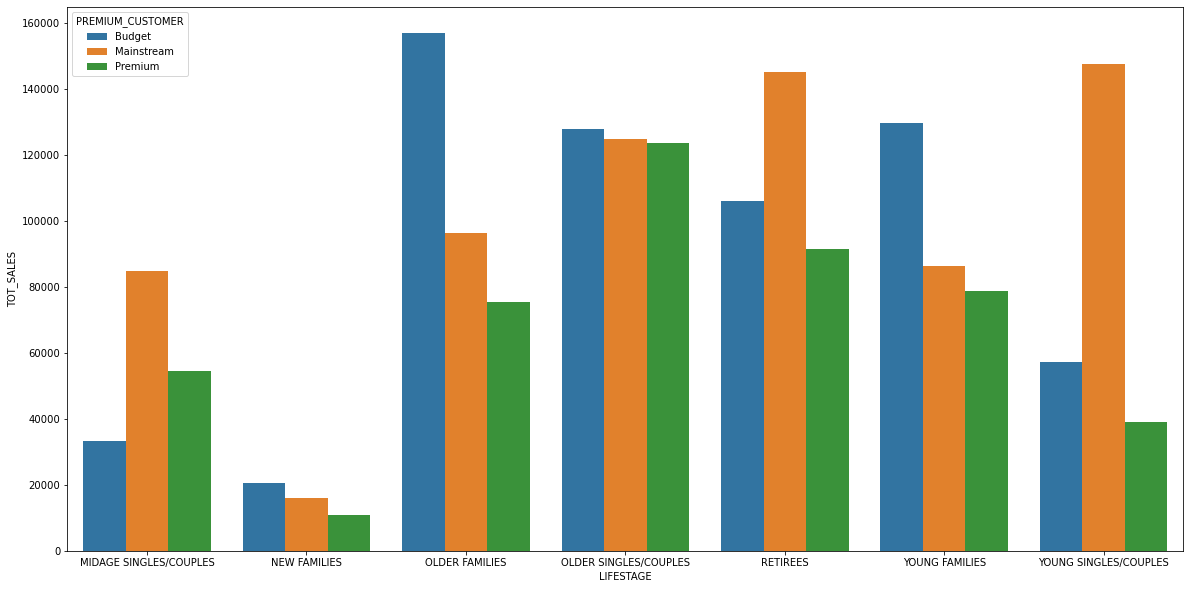

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(y=lifestage_premium_totsales.reset_index()['TOT_SALES'],x=lifestage_premium_totsales.reset_index()['LIFESTAGE'],hue=lifestage_premium_totsales.reset_index()['PREMIUM_CUSTOMER'])

In [62]:
lifestage_premium_avgsalquan = merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
lifestage_premium_avgsalquan

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               8883
                        Mainstream          21213
                        Premium             14400
NEW FAMILIES            Budget               5241
                        Mainstream           4060
                        Premium              2769
OLDER FAMILIES          Budget              41853
                        Mainstream          25804
                        Premium             20239
OLDER SINGLES/COUPLES   Budget              32883
                        Mainstream          32607
                        Premium             31695
RETIREES                Budget              26932
                        Mainstream          37677
                        Premium             23266
YOUNG FAMILIES          Budget              34482
                        Mainstream          23194
                        Premium             20901
YOUNG SINGLES/COUPLES   Budget              15500
         

In [68]:
lifestage_premium_avgsalquan = pd.DataFrame(lifestage_premium_avgsalquan)


In [91]:
lifestage_premium_avgsalquan.sort_values(by='PROD_QTY')

Count  PROD_QTY  AVG_SAL_QTY
LIFESTAGE              PREMIUM_CUSTOMER                              
NEW FAMILIES           Premium             588      2769     4.709184
                       Mainstream          849      4060     4.782097
                       Budget             1112      5241     4.713129
MIDAGE SINGLES/COUPLES Budget             1504      8883     5.906250
YOUNG SINGLES/COUPLES  Premium            2574     10575     4.108392
MIDAGE SINGLES/COUPLES Premium            2431     14400     5.923488
YOUNG SINGLES/COUPLES  Budget             3779     15500     4.101614
OLDER FAMILIES         Premium            2274     20239     8.900176
YOUNG FAMILIES         Premium            2433     20901     8.590629
MIDAGE SINGLES/COUPLES Mainstream         3340     21213     6.351198
YOUNG FAMILIES         Mainstream         2728     23194     8.502199
RETIREES               Premium            3872     23266     6.008781
OLDER FAMILIES         Mainstream         2831     25804     9.114800
RETIREES               Budget             4454     26932     6.046700
OLDER SINGLES/COUPLES  Premium            4750     31695     6.672632
                       Mainstream         4930     32607     6.613996
                       Budget             4929     32883     6.671333
YOUNG FAMILIES         Budget             4017     34482     8.584018
YOUNG SINGLES/COUPLES  Mainstream         8088     36225     4.478858
RETIREES               Mainstream         6479     37677     5.815249
OLDER FAMILIES         Budget             4675     41853     8.952513

In [70]:
lifestage_premium_avgsalquan = pd.merge(lifestage_premium_count,lifestage_premium_avgsalquan,on=['LIFESTAGE','PREMIUM_CUSTOMER'])

In [71]:
lifestage_premium_avgsalquan

Count  PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget             1504      8883
                       Mainstream         3340     21213
                       Premium            2431     14400
NEW FAMILIES           Budget             1112      5241
                       Mainstream          849      4060
                       Premium             588      2769
OLDER FAMILIES         Budget             4675     41853
                       Mainstream         2831     25804
                       Premium            2274     20239
OLDER SINGLES/COUPLES  Budget             4929     32883
                       Mainstream         4930     32607
                       Premium            4750     31695
RETIREES               Budget             4454     26932
                       Mainstream         6479     37677
                       Premium            3872     23266
YOUNG FAMILIES         Budget             4017     34482
                       Mainstream         2728     23194
                       Premium            2433     20901
YOUNG SINGLES/COUPLES  Budget             3779     15500
                       Mainstream         8088     36225
                       Premium            2574     10575

In [72]:
lifestage_premium_avgsalquan ['AVG_SAL_QTY'] = lifestage_premium_avgsalquan['PROD_QTY']/lifestage_premium_avgsalquan['Count']

In [94]:
lifestage_premium_avgsalquan.sort_values(by='AVG_SAL_QTY')


Count  PROD_QTY  AVG_SAL_QTY
LIFESTAGE              PREMIUM_CUSTOMER                              
YOUNG SINGLES/COUPLES  Budget             3779     15500     4.101614
                       Premium            2574     10575     4.108392
                       Mainstream         8088     36225     4.478858
NEW FAMILIES           Premium             588      2769     4.709184
                       Budget             1112      5241     4.713129
                       Mainstream          849      4060     4.782097
RETIREES               Mainstream         6479     37677     5.815249
MIDAGE SINGLES/COUPLES Budget             1504      8883     5.906250
                       Premium            2431     14400     5.923488
RETIREES               Premium            3872     23266     6.008781
                       Budget             4454     26932     6.046700
MIDAGE SINGLES/COUPLES Mainstream         3340     21213     6.351198
OLDER SINGLES/COUPLES  Mainstream         4930     32607     6.613996
                       Budget             4929     32883     6.671333
                       Premium            4750     31695     6.672632
YOUNG FAMILIES         Mainstream         2728     23194     8.502199
                       Budget             4017     34482     8.584018
                       Premium            2433     20901     8.590629
OLDER FAMILIES         Premium            2274     20239     8.900176
                       Budget             4675     41853     8.952513
                       Mainstream         2831     25804     9.114800

Text(0, 0.5, 'Average Sales Quantity')

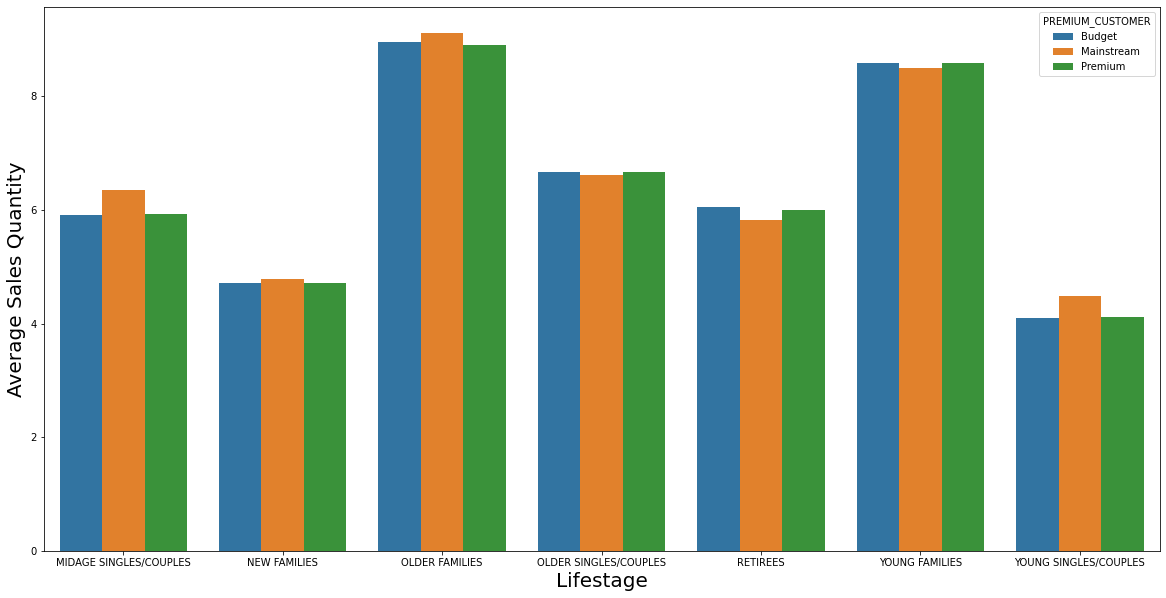

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(y=lifestage_premium_avgsalquan.reset_index()['AVG_SAL_QTY'],x=lifestage_premium_avgsalquan.reset_index()['LIFESTAGE'],hue=lifestage_premium_avgsalquan.reset_index()['PREMIUM_CUSTOMER'])
plt.xlabel('Lifestage',fontsize=20)
plt.ylabel('Average Sales Quantity',fontsize = 20)

In [75]:
lifestage_premium_avgsalprice = pd.merge(lifestage_premium_totsales,lifestage_premium_avgsalquan,on=['LIFESTAGE','PREMIUM_CUSTOMER'])

In [92]:
lifestage_premium_avgsalprice.sort_values(by='AVG_SAL_QTY')

TOT_SALES  Count  PROD_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                               
YOUNG SINGLES/COUPLES  Budget             57122.10   3779     15500   
                       Premium            39052.30   2574     10575   
                       Mainstream        147582.20   8088     36225   
NEW FAMILIES           Premium            10760.80    588      2769   
                       Budget             20607.45   1112      5241   
                       Mainstream         15979.70    849      4060   
RETIREES               Mainstream        145168.95   6479     37677   
MIDAGE SINGLES/COUPLES Budget             33345.70   1504      8883   
                       Premium            54443.85   2431     14400   
RETIREES               Premium            91296.65   3872     23266   
                       Budget            105916.30   4454     26932   
MIDAGE SINGLES/COUPLES Mainstream         84734.25   3340     21213   
OLDER SINGLES/COUPLES  Mainstream        124648.50   4930     32607   
                       Budget            127833.60   4929     32883   
                       Premium           123537.55   4750     31695   
YOUNG FAMILIES         Mainstream         86338.25   2728     23194   
                       Budget            129717.95   4017     34482   
                       Premium            78571.70   2433     20901   
OLDER FAMILIES         Premium            75242.60   2274     20239   
                       Budget            156863.75   4675     41853   
                       Mainstream         96413.55   2831     25804   

                                         AVG_SAL_QTY  AVG_SAL_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                              
YOUNG SINGLES/COUPLES  Budget               4.101614       3.685297  
                       Premium              4.108392       3.692889  
                       Mainstream           4.478858       4.074043  
NEW FAMILIES           Premium              4.709184       3.886168  
                       Budget               4.713129       3.931969  
                       Mainstream           4.782097       3.935887  
RETIREES               Mainstream           5.815249       3.852986  
MIDAGE SINGLES/COUPLES Budget               5.906250       3.753878  
                       Premium              5.923488       3.780823  
RETIREES               Premium              6.008781       3.924037  
                       Budget               6.046700       3.932731  
MIDAGE SINGLES/COUPLES Mainstream           6.351198       3.994449  
OLDER SINGLES/COUPLES  Mainstream           6.613996       3.822753  
                       Budget               6.671333       3.887529  
                       Premium              6.672632       3.897698  
YOUNG FAMILIES         Mainstream           8.502199       3.722439  
                       Budget               8.584018       3.761903  
                       Premium              8.590629       3.759232  
OLDER FAMILIES         Premium              8.900176       3.717703  
                       Budget               8.952513       3.747969  
                       Mainstream           9.114800       3.736380

In [77]:
lifestage_premium_avgsalprice['AVG_SAL_PRICE'] = lifestage_premium_avgsalprice['TOT_SALES']/lifestage_premium_avgsalprice['PROD_QTY']

In [93]:
lifestage_premium_avgsalprice.sort_values(by='AVG_SAL_PRICE')

TOT_SALES  Count  PROD_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                               
YOUNG SINGLES/COUPLES  Budget             57122.10   3779     15500   
                       Premium            39052.30   2574     10575   
OLDER FAMILIES         Premium            75242.60   2274     20239   
YOUNG FAMILIES         Mainstream         86338.25   2728     23194   
OLDER FAMILIES         Mainstream         96413.55   2831     25804   
                       Budget            156863.75   4675     41853   
MIDAGE SINGLES/COUPLES Budget             33345.70   1504      8883   
YOUNG FAMILIES         Premium            78571.70   2433     20901   
                       Budget            129717.95   4017     34482   
MIDAGE SINGLES/COUPLES Premium            54443.85   2431     14400   
OLDER SINGLES/COUPLES  Mainstream        124648.50   4930     32607   
RETIREES               Mainstream        145168.95   6479     37677   
NEW FAMILIES           Premium            10760.80    588      2769   
OLDER SINGLES/COUPLES  Budget            127833.60   4929     32883   
                       Premium           123537.55   4750     31695   
RETIREES               Premium            91296.65   3872     23266   
NEW FAMILIES           Budget             20607.45   1112      5241   
RETIREES               Budget            105916.30   4454     26932   
NEW FAMILIES           Mainstream         15979.70    849      4060   
MIDAGE SINGLES/COUPLES Mainstream         84734.25   3340     21213   
YOUNG SINGLES/COUPLES  Mainstream        147582.20   8088     36225   

                                         AVG_SAL_QTY  AVG_SAL_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                              
YOUNG SINGLES/COUPLES  Budget               4.101614       3.685297  
                       Premium              4.108392       3.692889  
OLDER FAMILIES         Premium              8.900176       3.717703  
YOUNG FAMILIES         Mainstream           8.502199       3.722439  
OLDER FAMILIES         Mainstream           9.114800       3.736380  
                       Budget               8.952513       3.747969  
MIDAGE SINGLES/COUPLES Budget               5.906250       3.753878  
YOUNG FAMILIES         Premium              8.590629       3.759232  
                       Budget               8.584018       3.761903  
MIDAGE SINGLES/COUPLES Premium              5.923488       3.780823  
OLDER SINGLES/COUPLES  Mainstream           6.613996       3.822753  
RETIREES               Mainstream           5.815249       3.852986  
NEW FAMILIES           Premium              4.709184       3.886168  
OLDER SINGLES/COUPLES  Budget               6.671333       3.887529  
                       Premium              6.672632       3.897698  
RETIREES               Premium              6.008781       3.924037  
NEW FAMILIES           Budget               4.713129       3.931969  
RETIREES               Budget               6.046700       3.932731  
NEW FAMILIES           Mainstream           4.782097       3.935887  
MIDAGE SINGLES/COUPLES Mainstream           6.351198       3.994449  
YOUNG SINGLES/COUPLES  Mainstream           4.478858       4.074043

Text(0, 0.5, 'Average Sales Quantity')

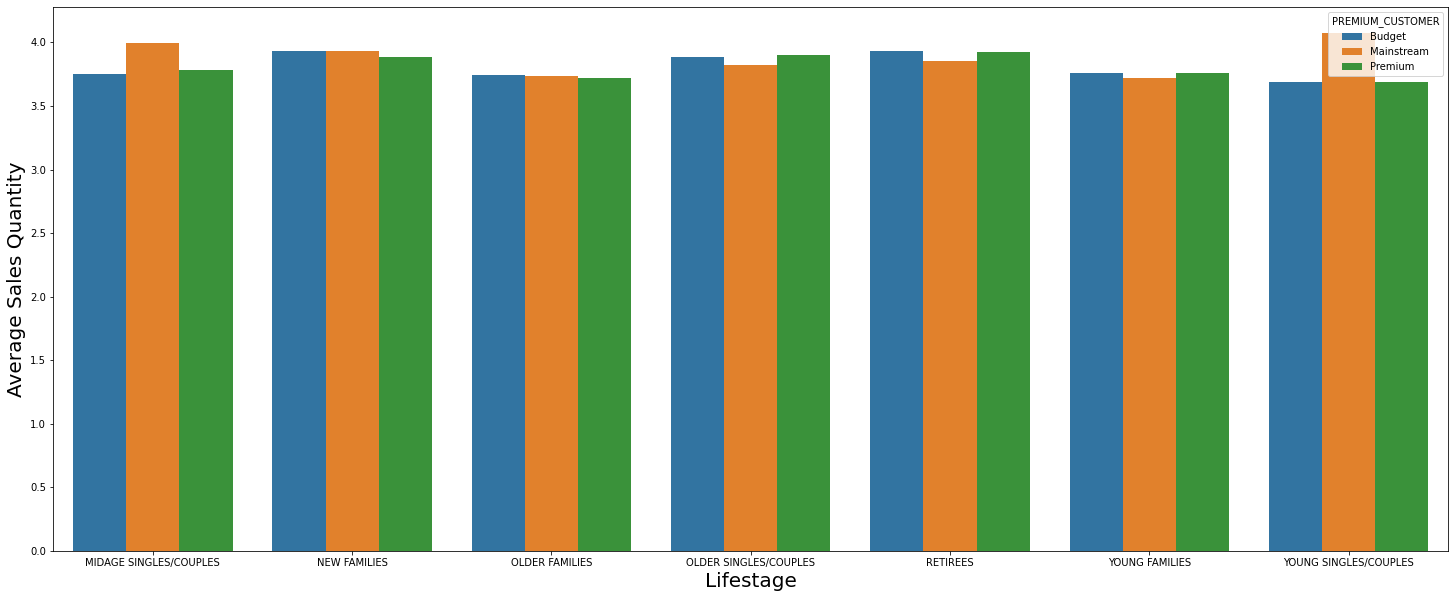

In [80]:
plt.figure(figsize=(25,10))
sns.barplot(y=lifestage_premium_avgsalprice.reset_index()['AVG_SAL_PRICE'],x=lifestage_premium_avgsalprice.reset_index()['LIFESTAGE'],hue=lifestage_premium_avgsalprice.reset_index()['PREMIUM_CUSTOMER'])
plt.xlabel('Lifestage',fontsize=20)
plt.ylabel('Average Sales Price',fontsize = 20)

YOUNG SINGLES/COUPLES Premium


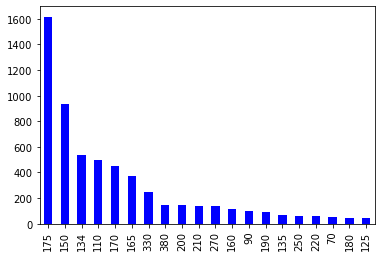

YOUNG SINGLES/COUPLES Budget


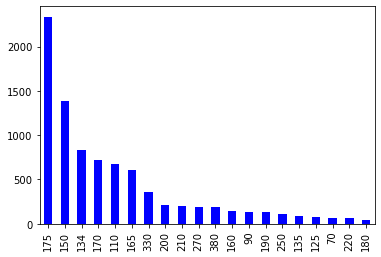

YOUNG SINGLES/COUPLES Mainstream


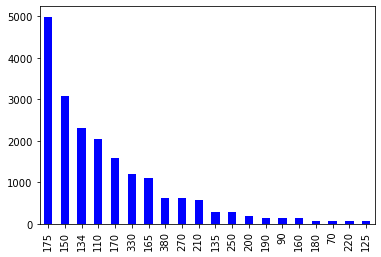

MIDAGE SINGLES/COUPLES Premium


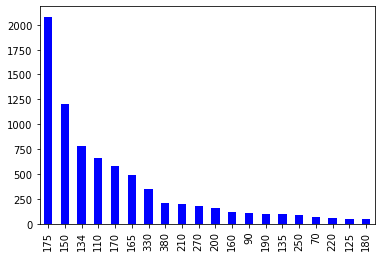

MIDAGE SINGLES/COUPLES Budget


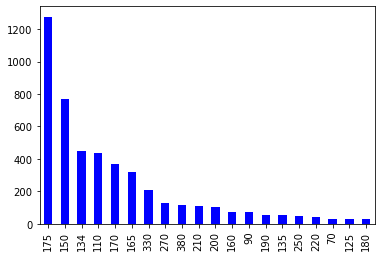

MIDAGE SINGLES/COUPLES Mainstream


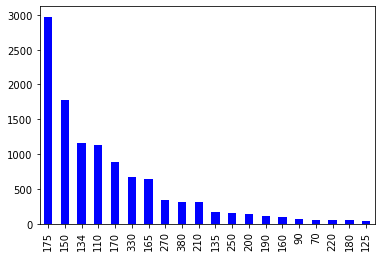

NEW FAMILIES Premium


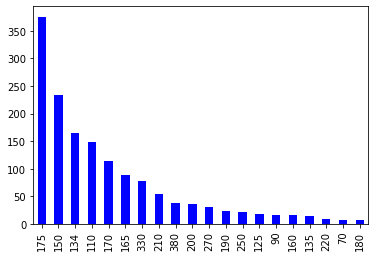

NEW FAMILIES Budget


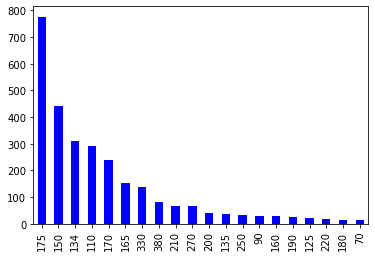

NEW FAMILIES Mainstream


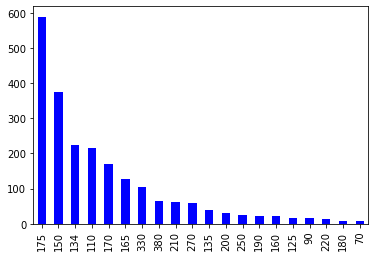

OLDER FAMILIES Premium


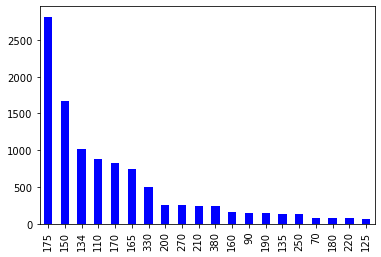

OLDER FAMILIES Budget


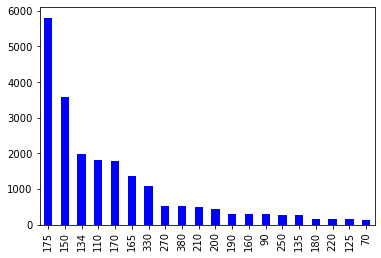

OLDER FAMILIES Mainstream


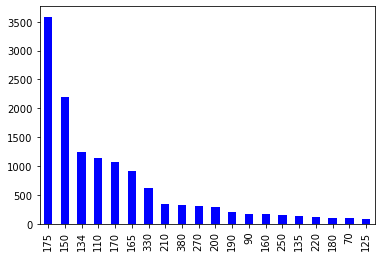

OLDER SINGLES/COUPLES Premium


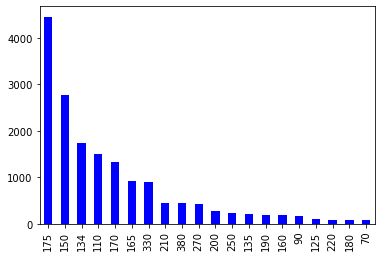

OLDER SINGLES/COUPLES Budget


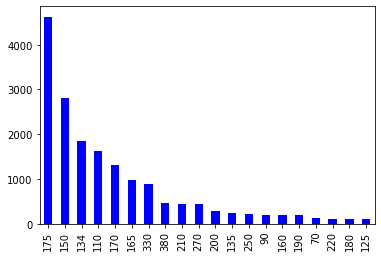

OLDER SINGLES/COUPLES Mainstream


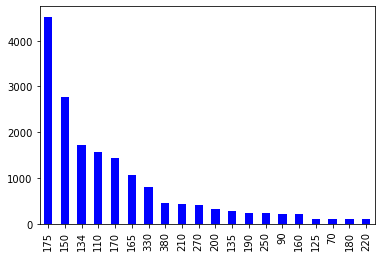

RETIREES Premium


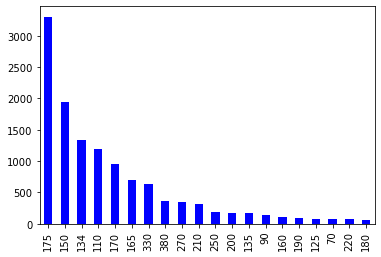

RETIREES Budget


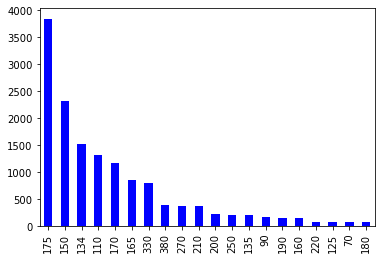

RETIREES Mainstream


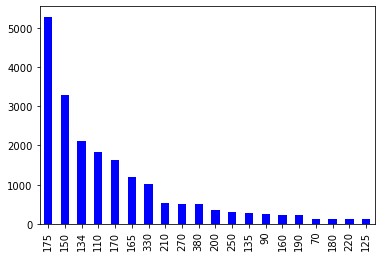

YOUNG FAMILIES Premium


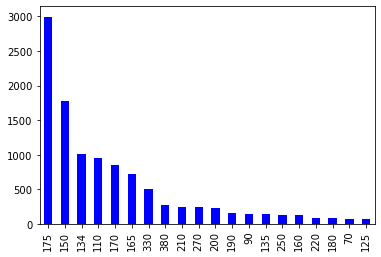

YOUNG FAMILIES Budget


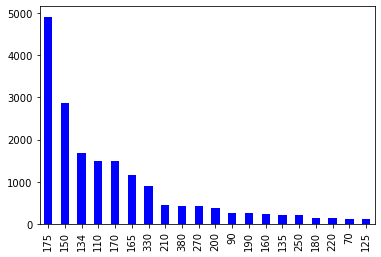

YOUNG FAMILIES Mainstream


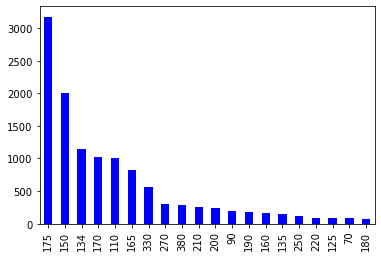

In [106]:
for life in merged['LIFESTAGE'].unique():
    for pre in merged['PREMIUM_CUSTOMER'].unique():
        
        total = merged[(merged['LIFESTAGE']==life) & (merged['PREMIUM_CUSTOMER']==pre)]['PACT_SIZE'].value_counts()
        print(life,pre)
        total.plot(kind='bar',color='blue')
        plt.show()

In [109]:
trans_d = trans.groupby(['month'])['PROD_QTY'].sum()

In [112]:
trans_d= pd.DataFrame(trans_d)

In [114]:
trans_d.sort_values(by='PROD_QTY')

,PROD_QTY
month,
2,36541
5,38257
8,38481
4,38980
9,39001
6,39042
11,39045
1,39519
10,39911


## INSIGHTS

LIFESTAGE-
Top three in Lifestage
Retirees - 14805
Older Single Couple - 14609
Young single Couple - 14441

Mainstream consist of maximum number of % ie. 40% followed by budget which is 33%

Maximum numbrer of customer in premium based on Lifestagee
Young single Couple Mainstream - 8088
Retirees Mainstream - 6479
Older single/couple - 4930


Popular brand among each cateogry is Kettle followed by Smiths but for young single couple 2nd most preferred brand is doritos

In all the category first preference is packet size is 175g followed by 150g

By Observing the graph of Average Sale price it can be concluded that Young single/couple of mainstream tend to spend more on chips followed by Midage Single/Couple. Minimum expenditure on chips is of Young single/couple of Budget
stream.


It can be observed that Older families of all stream tends to buy more chips followed by Yougn families.





 Maximum PROD_QTY sold is in month of December followed by March and then July.
December can be a maximum sale becuase of christmas time period as people tend to 
do a lot of shopping and exchange gift

# Recommendation

1.Older Families/ Young Families based on Sale Qty as they tend to buy more chips
Running Promotion like buy 2 for $4 and each for $2.50
or
Other promotion can be buy 2 get 1 free
or 
The prices of chips can be dropped by percentage such as 20% ,25%, 30%.
The above will help to boost up the sale.

2.Based on Packet Size
Running promotion based on Packet Size that are selling less .
All the promotion mentioned above can also boost up the sale of other packet size.

3.Young single Couple and Retiress  - Mainstream
Both consist of maximum number of customer.
Chips Can be Put in Special Bay/ Counter so that it grab their attention
or
The chips can also be placed to the daily neends of the customer
or
Promtion on Different Flavour of same brand can boost up the sales.




4. Promotion Should be run in the month of February as least product quantity is sold in this month.